In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
plt.style.use('seaborn')
my_cmap = sns.light_palette("Navy", as_cmap=True)

In [356]:
train_data = pd.read_excel('data/E1_ Training 2023_February.xlsx')
experiment_data = pd.read_excel('data/E1_ Understanding Threats 2023_February 9, 2023.xlsx')
cleaned_experiment_data = pd.read_excel('data/E1_2022_Cleaned_Understanding+Threats_Raw_Data - Cleaned.xlsx')

In [357]:
experiment_data.columns

Index(['StartDate', 'EndDate', 'Progress', 'Duration (in seconds)', 'Finished',
       'RecordedDate', 'ResponseId', 'DistributionChannel', 'UserLanguage',
       'StudentID_4', 'Q36', 'GroupA', 'Q25_First Click', 'Q25_Last Click',
       'Q25_Page Submit', 'Q25_Click Count', 'ExperimentA', 'ExperimentB',
       'PerceptionA_1', 'PerceptionA_2', 'PerceptionA_3', 'PerceptionA_4',
       'PerceptionA_5', 'PerceptionA_6', 'PerceptionA_7', 'PerceptionB_1',
       'PerceptionB_2', 'PerceptionB_3', 'PerceptionB_4', 'PerceptionB_5',
       'PerceptionB_6', 'FamiliaryKubernetes', 'FamiliaritySTRIDE',
       'PerceivedCorrect', 'Process.Correct', 'Process.Understand',
       'Process.Time', 'Process.Training', 'Process.Material',
       'Process.remarks'],
      dtype='object')

In [358]:
group = experiment_data['GroupA'].iloc[1:]
print(group.value_counts())

Group B    43
Group A    43
Name: GroupA, dtype: int64


In [359]:
train_data.columns

Index(['StartDate', 'EndDate', 'Progress', 'Duration (in seconds)', 'Finished',
       'RecordedDate', 'ResponseId', 'DistributionChannel', 'UserLanguage',
       'StudentID_6', 'Q36', 'Github', 'STRIDE', 'Q3_1', 'Q3_2', 'Q3_3',
       'Q3_4', 'T1_First Click', 'T1_Last Click', 'T1_Page Submit',
       'T1_Click Count'],
      dtype='object')

In [360]:
valid_data = pd.merge(experiment_data, train_data,  how='inner', left_on=['StudentID_4'], right_on = ['StudentID_6'])
valid_data.describe()

,StartDate_x,EndDate_x,Progress_x,Duration (in seconds)_x,Finished_x,RecordedDate_x,ResponseId_x,DistributionChannel_x,UserLanguage_x,StudentID_4,...,Github,STRIDE,Q3_1,Q3_2,Q3_3,Q3_4,T1_First Click,T1_Last Click,T1_Page Submit,T1_Click Count
count,80,80,80.0,80.0,80,80,80,80,80,80,...,80,80,80,80,80,80,80.0,80.0,80.000,80.0
unique,75,78,1.0,78.0,1,78,78,1,1,76,...,5,4,5,5,5,5,32.0,32.0,77.000,11.0
top,2023-02-09 13:36:18,2023-02-09 14:09:54,100.0,2016.0,True,2023-02-09 14:09:54.963000,R_1K28kCFt21rxcQ4,anonymous,EN,Tim,...,"I have tried tools for developing, deploying o...",I am a novice in secure design topics (I haven...,Adequate,Adequate,Limited,Adequate,0.0,0.0,88.226,0.0
freq,3,2,80.0,2.0,80,2,2,80,80,4,...,29,73,27,33,32,22,48.0,48.0,2.000,48.0


In [361]:
valid_data['GroupA'].value_counts()

Group B    41
Group A    39
Name: GroupA, dtype: int64

In [362]:
valid_data.columns

Index(['StartDate_x', 'EndDate_x', 'Progress_x', 'Duration (in seconds)_x',
       'Finished_x', 'RecordedDate_x', 'ResponseId_x', 'DistributionChannel_x',
       'UserLanguage_x', 'StudentID_4', 'Q36_x', 'GroupA', 'Q25_First Click',
       'Q25_Last Click', 'Q25_Page Submit', 'Q25_Click Count', 'ExperimentA',
       'ExperimentB', 'PerceptionA_1', 'PerceptionA_2', 'PerceptionA_3',
       'PerceptionA_4', 'PerceptionA_5', 'PerceptionA_6', 'PerceptionA_7',
       'PerceptionB_1', 'PerceptionB_2', 'PerceptionB_3', 'PerceptionB_4',
       'PerceptionB_5', 'PerceptionB_6', 'FamiliaryKubernetes',
       'FamiliaritySTRIDE', 'PerceivedCorrect', 'Process.Correct',
       'Process.Understand', 'Process.Time', 'Process.Training',
       'Process.Material', 'Process.remarks', 'StartDate_y', 'EndDate_y',
       'Progress_y', 'Duration (in seconds)_y', 'Finished_y', 'RecordedDate_y',
       'ResponseId_y', 'DistributionChannel_y', 'UserLanguage_y',
       'StudentID_6', 'Q36_y', 'Github', 'STRIDE'

In [363]:
valid_data[['STRIDE', 'GroupA']].value_counts()

STRIDE                                                                                                                                                           GroupA 
I am a novice in secure design topics (I haven't seen this before)                                                                                               Group B    38
                                                                                                                                                                 Group A    35
I have attended some lectures or a full course on secure design techniques (e.g., course on threat modeling with STRIDE)                                         Group A     4
I am a professional in secure design topics (e.g., threat modeler using STRIDE (>2 years work)) or have an equivalent professional experience                    Group B     1
I have attended some lectures or a full course on secure design techniques (e.g., course on threat modeling with STRIDE)           

In [364]:
valid_data[['Github', 'GroupA']].value_counts()

Github                                                                                                                            GroupA 
I have tried tools for developing, deploying or orchestrating software with Github in hands-on labs or during short internships   Group B    15
                                                                                                                                  Group A    14
I have used tools for developing, deploying or orchestrating software with Github during my professional experiences (>3 months)  Group B    13
I have attended a some lectures on Github in a course or on some web site                                                         Group B    11
I have used tools for developing, deploying or orchestrating software with Github during my professional experiences (>3 months)  Group A    11
I have attended a some lectures on Github in a course or on some web site                                                         Group A     

In [365]:
print(min(valid_data['Duration (in seconds)_y']), max(valid_data['Duration (in seconds)_y'])) 

124.0 68338.0


In [366]:
valid_data['Process.Understand'].value_counts()

Agree                         47
Strongly agree                16
Neither-Agree-nor-Disagree     8
Disagree                       6
Strongly disagree              3
Name: Process.Understand, dtype: int64

Text(0, 0.5, 'Group')

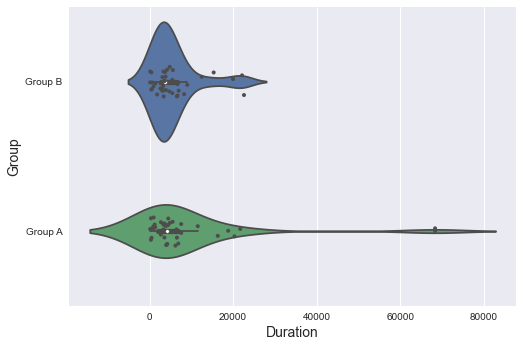

In [367]:
valid_data['Duration (in seconds)_x'] = pd.to_numeric(valid_data['Duration (in seconds)_x'])
valid_data['Duration (in seconds)_y'] = pd.to_numeric(valid_data['Duration (in seconds)_y'])
sns.violinplot(data=valid_data[['Duration (in seconds)_y', 'GroupA']], x="Duration (in seconds)_y", y="GroupA")

# Add in points to show each observation
sns.stripplot(data=valid_data[['Duration (in seconds)_y', 'GroupA']], x="Duration (in seconds)_y", y="GroupA",
              size=4, color=".3", linewidth=0)
plt.xlabel('Duration', fontsize=14)
plt.ylabel('Group', fontsize=14)

In [368]:
df_group_a_data = valid_data.loc[valid_data['GroupA'].str.contains('Group A')]
df_group_b_data = valid_data.loc[valid_data['GroupA'].str.contains('Group B')]
group_a_count, group_b_count = group_a_data['ExperimentA'].count(), group_b_data['ExperimentB'].count()
print(group_a_count, group_b_count)

39 41


In [369]:
def extract_answer(data, name):
    def assign_index(answer):
        if answer == None or answer == np.nan:
            return 0
        else:
            return int(answer)

    group_result = data[name].str.split(',', expand=True)
    df_answer = pd.Series([list() for _ in range(len(data.index))], index=data.index)
    for i in group_result:
        bool_array = group_result[i].str.split('.',expand=True)[0]
        bool_array = bool_array.apply(assign_index)
        for idx in df_answer.index:
            df_answer.loc[idx].append(bool_array.loc[idx]) if bool_array.loc[idx]!=0 else None
    return df_answer

In [402]:
df_group_a_data['Answer'] = extract_answer(df_group_a_data, 'ExperimentA').values
df_group_b_data['Answer'] = extract_answer(df_group_b_data, 'ExperimentB').values

total_answer = 11
correct_answer = [1,2,3,4,5,6]
df_group_a_data['PositiveCount'] = df_group_a_data['Answer'].apply(lambda x: len(x))
df_group_a_data['TruePositive'] = df_group_a_data['Answer'].apply(lambda x: len(set(x).intersection(correct_answer)))
df_group_a_data['FalsePositive'] = df_group_a_data['PositiveCount'] - df_group_a_data['TruePositive']
df_group_a_data['FalseNegative'] = (len(correct_answer) - df_group_a_data['TruePositive'])
df_group_a_data['TrueNegative'] = total_answer - df_group_a_data['PositiveCount'] - df_group_a_data['FalseNegative']

df_group_b_data['PositiveCount'] = df_group_b_data['Answer'].apply(lambda x: len(x))
df_group_b_data['TruePositive'] = df_group_b_data['Answer'].apply(lambda x: len(set(x).intersection(correct_answer)))
df_group_b_data['FalsePositive'] = df_group_b_data['PositiveCount'] - df_group_b_data['TruePositive']
df_group_b_data['FalseNegative'] = (len(correct_answer) - df_group_b_data['TruePositive'])
df_group_b_data['TrueNegative'] = total_answer - df_group_b_data['PositiveCount'] - df_group_b_data['FalseNegative']

df_group_a_data['Precision'] = df_group_a_data['TruePositive'] / (df_group_a_data['TruePositive'] + df_group_a_data['FalsePositive'])
df_group_a_data['Recall'] = df_group_a_data['TruePositive'] / (df_group_a_data['TruePositive'] + df_group_a_data['FalseNegative'])
df_group_a_data['Specificity'] = df_group_a_data['TrueNegative'] / (df_group_a_data['TrueNegative'] + df_group_a_data['FalsePositive'])
df_group_a_data['NPV'] = df_group_a_data['TrueNegative'] / (df_group_a_data['TrueNegative'] + df_group_a_data['FalseNegative'])
df_group_a_data['FallOut'] = df_group_a_data['FalsePositive'] / (df_group_a_data['TrueNegative'] + df_group_a_data['FalsePositive'])
df_group_a_data['FNR'] = df_group_a_data['FalseNegative'] / (df_group_a_data['TruePositive'] + df_group_a_data['FalseNegative'])
df_group_a_data['FDR'] = df_group_a_data['FalsePositive'] / (df_group_a_data['TruePositive'] + df_group_a_data['FalsePositive'])
df_group_a_data['Accuracy'] = (df_group_a_data['TruePositive'] + df_group_a_data['TrueNegative']) / total_answer
df_group_a_data['ErrorRate'] = 1- df_group_a_data['Accuracy'] 
df_group_a_data['F1'] = 2 * df_group_a_data['Precision'] * df_group_a_data['Recall'] / (df_group_a_data['Precision'] + df_group_a_data['Recall'])

df_group_b_data['Precision'] = df_group_b_data['TruePositive'] / (df_group_b_data['TruePositive'] + df_group_b_data['FalsePositive'])
df_group_b_data['Recall'] = df_group_b_data['TruePositive'] / (df_group_b_data['TruePositive'] + df_group_b_data['FalseNegative'])
df_group_b_data['Specificity'] = df_group_b_data['TrueNegative'] / (df_group_b_data['TrueNegative'] + df_group_b_data['FalsePositive'])
df_group_b_data['NPV'] = df_group_b_data['TrueNegative'] / (df_group_b_data['TrueNegative'] + df_group_b_data['FalseNegative'])
df_group_b_data['FallOut'] = df_group_b_data['FalsePositive'] / (df_group_b_data['TrueNegative'] + df_group_b_data['FalsePositive'])
df_group_b_data['FNR'] = df_group_b_data['FalseNegative'] / (df_group_b_data['TruePositive'] + df_group_b_data['FalseNegative'])
df_group_b_data['FDR'] = df_group_b_data['FalsePositive'] / (df_group_b_data['TruePositive'] + df_group_b_data['FalsePositive'])
df_group_b_data['Accuracy'] = (df_group_b_data['TruePositive'] + df_group_b_data['TrueNegative']) / total_answer
df_group_b_data['ErrorRate'] = 1- df_group_b_data['Accuracy'] 
df_group_b_data['F1'] = 2 * df_group_b_data['Precision'] * df_group_b_data['Recall'] / (df_group_b_data['Precision'] + df_group_b_data['Recall'])

C:\Users\HHhou\AppData\Local\Temp\ipykernel_18084\982146400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_a_data['Answer'] = extract_answer(df_group_a_data, 'ExperimentA').values
C:\Users\HHhou\AppData\Local\Temp\ipykernel_18084\982146400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_b_data['Answer'] = extract_answer(df_group_b_data, 'ExperimentB').values
C:\Users\HHhou\AppData\Local\Temp\ipykernel_18084\982146400.py:6: SettingWithCopyWarning: 
A value is trying to be set on a 

In [404]:
measurement_list = ['Precision', 'Recall', 'Specificity', 'NPV', 'FallOut', 'FNR', 'FDR', 'Accuracy', 'ErrorRate', 'F1']
print(df_group_a_data[measurement_list].describe())
print(df_group_b_data[measurement_list].describe())

       Precision     Recall  Specificity        NPV    FallOut        FNR  \
count  39.000000  39.000000    39.000000  38.000000  39.000000  39.000000   
mean    0.656782   0.632479     0.584615   0.581516   0.415385   0.367521   
std     0.175080   0.206543     0.235683   0.183031   0.235683   0.206543   
min     0.333333   0.166667     0.000000   0.250000   0.000000   0.000000   
25%     0.522727   0.500000     0.400000   0.446429   0.200000   0.166667   
50%     0.625000   0.666667     0.600000   0.571429   0.400000   0.333333   
75%     0.750000   0.833333     0.800000   0.714286   0.600000   0.500000   
max     1.000000   1.000000     1.000000   1.000000   1.000000   0.833333   

             FDR   Accuracy  ErrorRate         F1  
count  39.000000  39.000000  39.000000  39.000000  
mean    0.343218   0.610723   0.389277   0.630686  
std     0.175080   0.153187   0.153187   0.161605  
min     0.000000   0.363636   0.090909   0.222222  
25%     0.250000   0.500000   0.272727   0.545

Text(0, 0.5, 'Group')

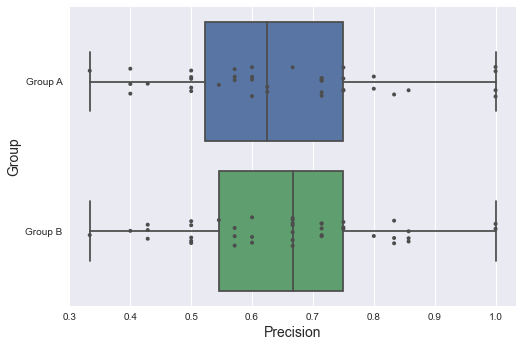

In [371]:
measurement_list.append('GroupA')
df_measurement = pd.concat([df_group_a_data[measurement_list], df_group_b_data[measurement_list]])
sns.boxplot(data=df_measurement[['Precision', 'GroupA']], x="Precision", y="GroupA")

# Add in points to show each observation
sns.stripplot(data=df_measurement[['Precision', 'GroupA']], x="Precision", y="GroupA",
              size=4, color=".3", linewidth=0)
plt.xlabel('Precision', fontsize=14)
plt.ylabel('Group', fontsize=14)

Text(0, 0.5, 'Group')

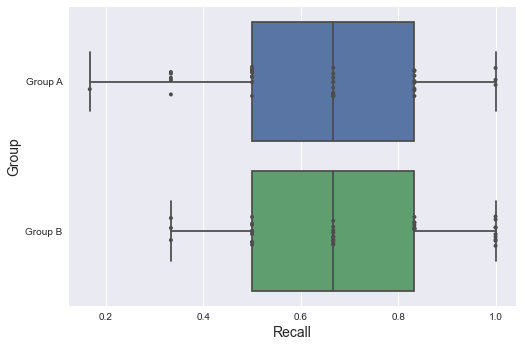

In [372]:
sns.boxplot(data=df_measurement[['Recall', 'GroupA']], x="Recall", y="GroupA")

# Add in points to show each observation
sns.stripplot(data=df_measurement[['Recall', 'GroupA']], x="Recall", y="GroupA",
              size=4, color=".3", linewidth=0)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Group', fontsize=14)

Text(0, 0.5, 'Group')

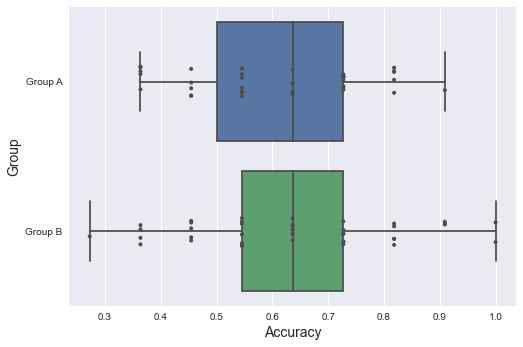

In [373]:
sns.boxplot(data=df_measurement[['Accuracy', 'GroupA']], x="Accuracy", y="GroupA")

# Add in points to show each observation
sns.stripplot(data=df_measurement[['Accuracy', 'GroupA']], x="Accuracy", y="GroupA",
              size=4, color=".3", linewidth=0)
plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Group', fontsize=14)

Text(0, 0.5, 'Group')

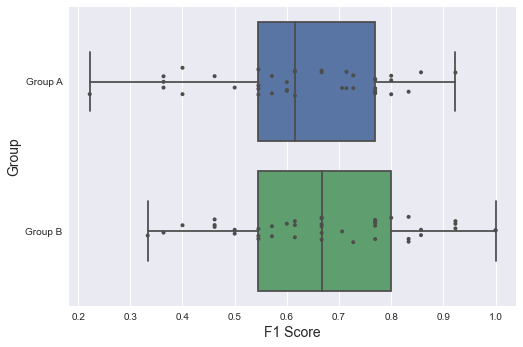

In [374]:
sns.boxplot(data=df_measurement[['F1', 'GroupA']], x="F1", y="GroupA")

# Add in points to show each observation
sns.stripplot(data=df_measurement[['F1', 'GroupA']], x="F1", y="GroupA",
              size=4, color=".3", linewidth=0)
plt.xlabel('F1 Score', fontsize=14)
plt.ylabel('Group', fontsize=14)

[20, 28, 33, 26, 17, 24, 16, 17, 16, 12, 20] [26, 27, 37, 25, 28, 32, 18, 25, 18, 13, 18]
                        Question  Index  Group_A  Group_B  Group_A_Accuracy  \
0            EXPLOIT-REMOTE-REPO      1       20       26          0.512821   
1             LEAKED-CONFIG-FILE      2       28       27          0.717949   
2               STOLEN-AUTH-INFO      3       33       37          0.846154   
3                     DOS-SERVER      4       26       25          0.666667   
4          MALICIOUS-CODE-GITHUB      5       17       28          0.435897   
5   ELEVATION-PRIVILEDGED-ACCESS      6       24       32          0.615385   
6                DOS-REMOTE-REPO      7       16       18          0.589744   
7           DISCLOSE-THIRD-PARTY      8       17       25          0.564103   
8     ELEVATION-PRIVILEDGED-REPO      9       16       18          0.589744   
9     ELEVATION-PRIVILEDGED-CODE     10       12       13          0.692308   
10         EXPLOIT-HTTP-PROTOCOL     11  

C:\Users\HHhou\AppData\Local\Temp\ipykernel_18084\3258172222.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_question['Group_A_Accuracy'][i] = 1 - df_question['Group_A_Accuracy'][i]
C:\Users\HHhou\AppData\Local\Temp\ipykernel_18084\3258172222.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_question['Group_B_Accuracy'][i] = 1 - df_question['Group_B_Accuracy'][i]


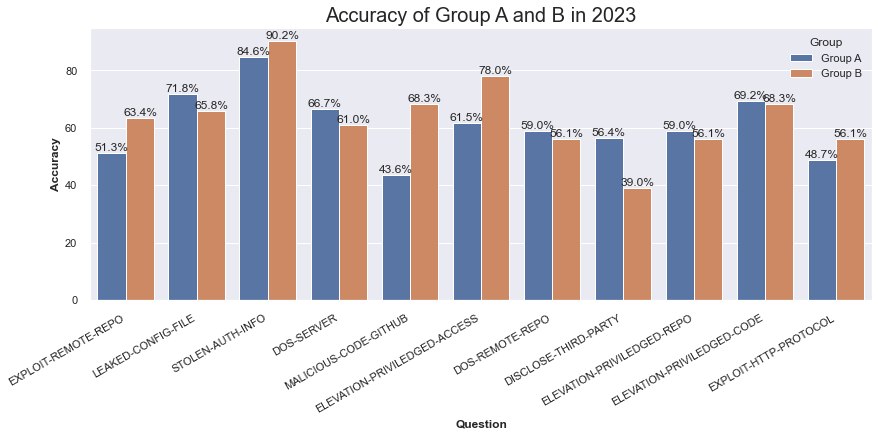

In [401]:
group_a_list, group_b_list = [0]*11, [0]*11

for i in df_group_a_data['Answer']:
    for j in i:
        group_a_list[int(j)-1] += 1

for i in df_group_b_data['Answer']:
    for j in i:
        group_b_list[int(j)-1] += 1
print(group_a_list, group_b_list)

question_list = ['EXPLOIT-REMOTE-REPO','LEAKED-CONFIG-FILE','STOLEN-AUTH-INFO','DOS-SERVER','MALICIOUS-CODE-GITHUB','ELEVATION-PRIVILEDGED-ACCESS','DOS-REMOTE-REPO','DISCLOSE-THIRD-PARTY','ELEVATION-PRIVILEDGED-REPO','ELEVATION-PRIVILEDGED-CODE','EXPLOIT-HTTP-PROTOCOL']
question_index = [i for i in range(1,12)]
d = {'Question': question_list, 'Index': question_index, 'Group_A': group_a_list, 'Group_B': group_b_list}
df_question = pd.DataFrame(data=d)
df_question['Group_A_Accuracy'] = df_question['Group_A'].apply(lambda x: (x/group_a_count))
df_question['Group_B_Accuracy'] = df_question['Group_B'].apply(lambda x: (x/group_b_count))
# print(df_question)
for i in range(6,11):
    df_question['Group_A_Accuracy'][i] = 1 - df_question['Group_A_Accuracy'][i]
    df_question['Group_B_Accuracy'][i] = 1 - df_question['Group_B_Accuracy'][i]
    # print(getattr(row,'Index'))
    # df_question[['Group A Accuracy', 'Group B Accuracy']] = 1 - df_question[['Group A Accuracy', 'Group B Accuracy']] if df_question['Index']>6 else df_question[['Group A Accuracy', 'Group B Accuracy']]
print(df_question)

df_group_a_question = df_question[['Question', 'Index', 'Group_A', 'Group_A_Accuracy']].rename(columns={'Group_A': 'Count', 'Group_A_Accuracy': 'Accuracy'})
df_group_a_question['Group'] = 'Group A'
df_group_b_question = df_question[['Question', 'Index', 'Group_B', 'Group_B_Accuracy']].rename(columns={'Group_B': 'Count', 'Group_B_Accuracy': 'Accuracy'})
df_group_b_question['Group'] = 'Group B'
df_question_new = pd.concat([df_group_a_question, df_group_b_question])
df_question_new['Accuracy'] = (df_question_new['Accuracy'] * 100).round(2)
print(df_question_new)

# set plot style: grey grid in the background:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 5))
g = sns.barplot(x="Question", y="Accuracy", hue="Group", data=df_question_new, ci=None)
g.set_title("Accuracy of Group A and B in 2023", fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')
g.set_xlabel("Question", fontweight='bold')
g.set_ylabel("Accuracy", fontweight='bold')
for container in g.containers:
    g.bar_label(container, fmt='%.1f%%')
# plt.tight_layout()
# g = sns.catplot(
#     data=df_question, kind="bar",
#     x="species", y="body_mass_g", hue="Group",
#     errorbar="sd", palette="dark", alpha=.6, height=6
# )
# g.set_axis_labels("", "Body mass (g)")
# g.legend.set_title("")

<ErrorbarContainer object of 3 artists>

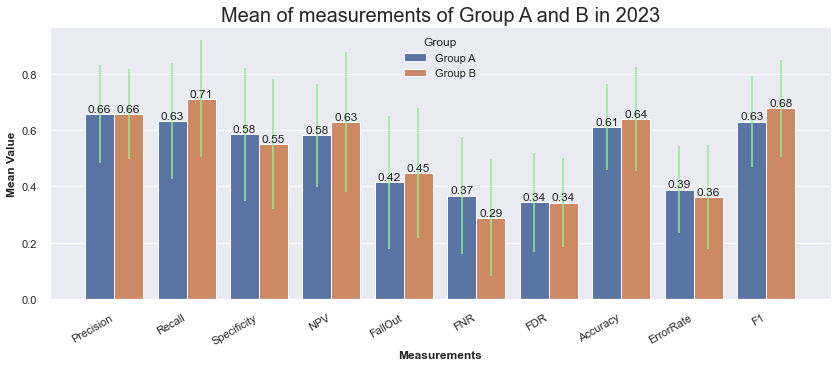

In [429]:
df_describe_a = df_group_a_data[measurement_list].describe()
df_describe_a = df_describe_a.transpose().reset_index()[['index', 'mean', 'std', 'min', 'max']]
df_describe_a['Group'] = 'Group A'

df_describe_b = df_group_b_data[measurement_list].describe()
df_describe_b = df_describe_b.transpose().reset_index()[['index', 'mean', 'std', 'min', 'max']]
df_describe_b['Group'] = 'Group B'

df_describe = pd.concat([df_describe_a, df_describe_b])
# df_describe

sns.set(style="darkgrid")
plt.figure(figsize=(14, 5))
g = sns.barplot(x="index", y="mean", hue="Group", data=df_describe, ci=None)
g.set_title("Mean of measurements of Group A and B in 2023", fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')
g.set_xlabel("Measurements", fontweight='bold')
g.set_ylabel("Mean Value", fontweight='bold')
for container in g.containers:
    g.bar_label(container, fmt='%.2f')
x_coords = [p.get_x() + 0.5*p.get_width() for p in g.patches]
y_coords = [p.get_height() for p in g.patches]
g.errorbar(x=x_coords, y=y_coords, yerr=df_describe['std'], ecolor='lightgreen', fmt="none", capsize=.3)

<AxesSubplot:title={'center':'Precision-Recall curves'}, xlabel='Recall', ylabel='Precision'>

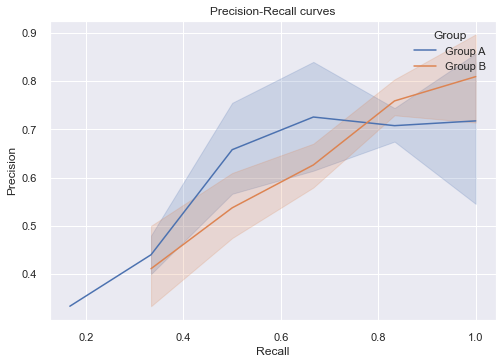

In [435]:
df_measurement['Group'] = df_measurement['GroupA']
plt.title('Precision-Recall curves')
# plt.legend(loc = 'lower right')
sns.lineplot(data=df_measurement, x='Recall', y='Precision', hue='Group')

In [436]:
df_measurement

,Precision,Recall,Specificity,NPV,FallOut,FNR,FDR,Accuracy,F1,GroupA,Group
2,0.500000,0.666667,0.2,0.333333,0.8,0.333333,0.500000,0.454545,0.571429,Group A,Group A
4,0.400000,0.333333,0.4,0.333333,0.6,0.666667,0.600000,0.363636,0.363636,Group A,Group A
5,0.500000,0.333333,0.6,0.428571,0.4,0.666667,0.500000,0.454545,0.400000,Group A,Group A
6,0.750000,0.500000,0.8,0.571429,0.2,0.500000,0.250000,0.636364,0.600000,Group A,Group A
7,0.714286,0.833333,0.6,0.750000,0.4,0.166667,0.285714,0.727273,0.769231,Group A,Group A
...,...,...,...,...,...,...,...,...,...,...,...
73,0.500000,0.666667,0.2,0.333333,0.8,0.333333,0.500000,0.454545,0.571429,Group B,Group B
74,0.750000,0.500000,0.8,0.571429,0.2,0.500000,0.250000,0.636364,0.600000,Group B,Group B
75,0.500000,0.333333,0.6,0.428571,0.4,0.666667,0.500000,0.454545,0.400000,Group B,Group B
76,0.666667,0.666667,0.6,0.600000,0.4,0.333333,0.333333,0.636364,0.666667,Group B,Group B


In [441]:
import scipy.stats as stats
metric_list = ['Precision', 'Recall', 'Specificity', 'NPV', 'FallOut', 'FNR', 'FDR', 'Accuracy', 'F1']
for metric in metric_list:
    print(f'{metric}: ', end='')
    print(stats.ttest_ind(df_measurement[metric][df_measurement['Group'] == 'Group A'],
                df_measurement[metric][df_measurement['Group'] == 'Group B']))

Precision: Ttest_indResult(statistic=-0.00669516567244015, pvalue=0.9946751647889306)
Recall: Ttest_indResult(statistic=-1.703517997565698, pvalue=0.09245257216685498)
Specificity: Ttest_indResult(statistic=0.6393828880003156, pvalue=0.5244472702479641)
NPV: Ttest_indResult(statistic=nan, pvalue=nan)
FallOut: Ttest_indResult(statistic=-0.6393828880003156, pvalue=0.5244472702479641)
FNR: Ttest_indResult(statistic=1.703517997565698, pvalue=0.09245257216685498)
FDR: Ttest_indResult(statistic=0.006695165672438664, pvalue=0.9946751647889318)
Accuracy: Ttest_indResult(statistic=-0.7324767379222754, pvalue=0.46607303566176594)
F1: Ttest_indResult(statistic=-1.2500006282606226, pvalue=0.2150367391085448)


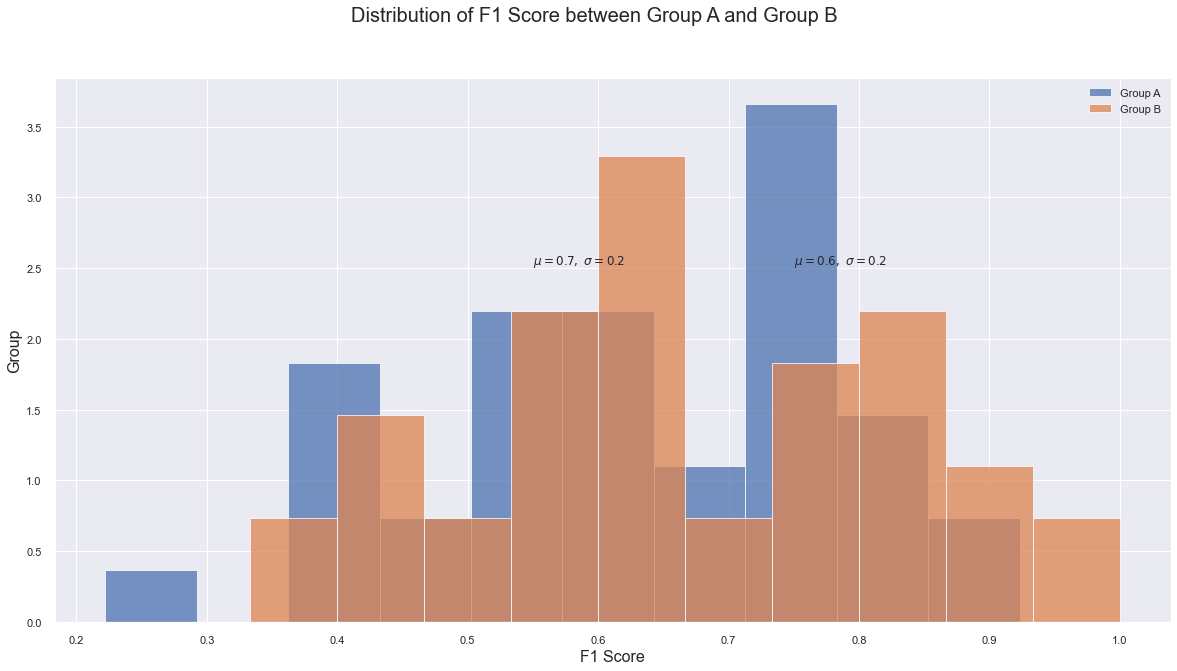

In [459]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)

p_bp_male = plt.hist(df_measurement['F1'][df_measurement['Group'] == 'Group A'], label= "Group A",
                     density= True,
                     alpha=0.75)
p_bp_female = plt.hist(df_measurement['F1'][df_measurement['Group'] == 'Group B'], label= "Group B",
                       density= True,
                       alpha=0.75)

plt.legend()
plt.suptitle("Distribution of F1 Score between Group A and Group B", fontsize= 20)
plt.xlabel("F1 Score", fontsize= 16)
plt.ylabel("Group", fontsize= 16)

plt.text(0.75, 2.525,
         f"$\mu= {df_measurement['F1'][df_measurement['Group'] == 'Group A'].mean(): .1f}, \ \sigma= {df_measurement['F1'][df_measurement['Group'] == 'Group A'].std(): .1f}$")
plt.text(0.55, 2.525,
         f"$\mu= {df_measurement['F1'][df_measurement['Group'] == 'Group B'].mean(): .1f}, \ \sigma= {df_measurement['F1'][df_measurement['Group'] == 'Group B'].std(): .1f}$")


plt.show()

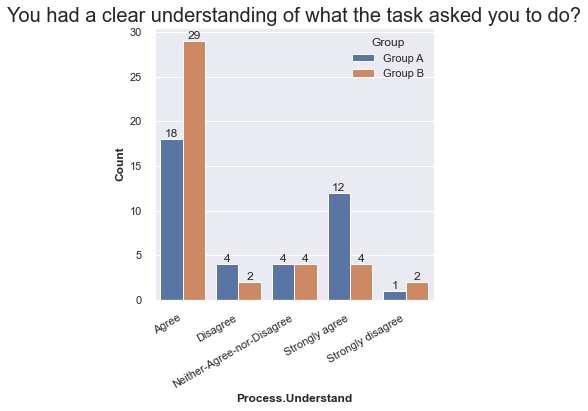

In [497]:
df_process_understand_a = df_group_a_data[['Process.Understand', 'Process.Correct', 'GroupA']].groupby('Process.Understand').count()
df_process_understand_a['Group'] = 'Group A'
df_process_understand_b = df_group_b_data[['Process.Understand', 'Process.Correct', 'GroupA']].groupby('Process.Understand').count()
df_process_understand_b['Group'] = 'Group B'

df_process_understand = pd.concat([df_process_understand_a, df_process_understand_b])
df_process_understand
sns.set(style="darkgrid")
plt.figure(figsize=(5, 5))
g = sns.barplot(x=df_process_understand.index, y="GroupA", hue="Group", data=df_process_understand, ci=None)
g.set_title("You had a clear understanding of what the task asked you to do?", fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')
g.set_xlabel("Process.Understand", fontweight='bold')
g.set_ylabel("Count", fontweight='bold')
for container in g.containers:
    g.bar_label(container, fmt='%.d')


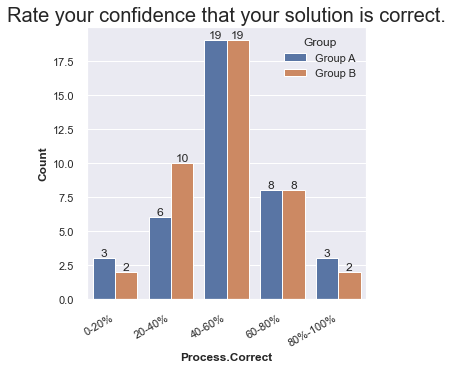

In [496]:
df_process_understand_a = df_group_a_data[['Process.Understand', 'Process.Correct', 'GroupA']].groupby('Process.Correct').count()
df_process_understand_a['Group'] = 'Group A'
df_process_understand_b = df_group_b_data[['Process.Understand', 'Process.Correct', 'GroupA']].groupby('Process.Correct').count()
df_process_understand_b['Group'] = 'Group B'

df_process_understand = pd.concat([df_process_understand_a, df_process_understand_b])
df_process_understand
sns.set(style="darkgrid")
plt.figure(figsize=(5, 5))
g = sns.barplot(x=df_process_understand.index, y="GroupA", hue="Group", data=df_process_understand, ci=None)
g.set_title("Rate your confidence that your solution is correct.", fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')
g.set_xlabel("Process.Correct", fontweight='bold')
g.set_ylabel("Count", fontweight='bold')
for container in g.containers:
    g.bar_label(container, fmt='%.d')


In [490]:
df_group_a_data.columns

Index(['StartDate_x', 'EndDate_x', 'Progress_x', 'Duration (in seconds)_x',
       'Finished_x', 'RecordedDate_x', 'ResponseId_x', 'DistributionChannel_x',
       'UserLanguage_x', 'StudentID_4', 'Q36_x', 'GroupA', 'Q25_First Click',
       'Q25_Last Click', 'Q25_Page Submit', 'Q25_Click Count', 'ExperimentA',
       'ExperimentB', 'PerceptionA_1', 'PerceptionA_2', 'PerceptionA_3',
       'PerceptionA_4', 'PerceptionA_5', 'PerceptionA_6', 'PerceptionA_7',
       'PerceptionB_1', 'PerceptionB_2', 'PerceptionB_3', 'PerceptionB_4',
       'PerceptionB_5', 'PerceptionB_6', 'FamiliaryKubernetes',
       'FamiliaritySTRIDE', 'PerceivedCorrect', 'Process.Correct',
       'Process.Understand', 'Process.Time', 'Process.Training',
       'Process.Material', 'Process.remarks', 'StartDate_y', 'EndDate_y',
       'Progress_y', 'Duration (in seconds)_y', 'Finished_y', 'RecordedDate_y',
       'ResponseId_y', 'DistributionChannel_y', 'UserLanguage_y',
       'StudentID_6', 'Q36_y', 'Github', 'STRIDE'

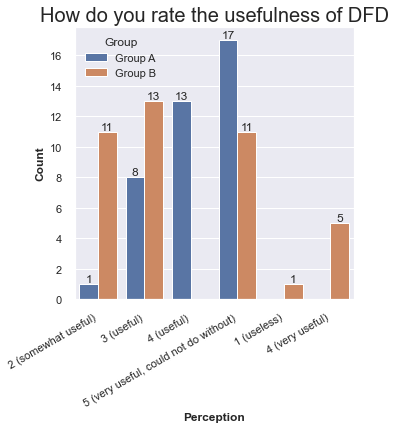

In [498]:
df_process_understand_a = df_group_a_data[['PerceptionA_4', 'Process.Correct', 'GroupA']].groupby('PerceptionA_4').count()
df_process_understand_a['Group'] = 'Group A'
df_process_understand_b = df_group_b_data[['PerceptionB_4', 'Process.Correct', 'GroupA']].groupby('PerceptionB_4').count()
df_process_understand_b['Group'] = 'Group B'

df_process_understand = pd.concat([df_process_understand_a, df_process_understand_b])
df_process_understand
sns.set(style="darkgrid")
plt.figure(figsize=(5, 5))
g = sns.barplot(x=df_process_understand.index, y="GroupA", hue="Group", data=df_process_understand, ci=None)
g.set_title("How do you rate the usefulness of DFD", fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')
g.set_xlabel("Perception", fontweight='bold')
g.set_ylabel("Count", fontweight='bold')
for container in g.containers:
    g.bar_label(container, fmt='%.d')

# 2.1 How do you rate the usefulness of the information sources (in the handout material) you were given for the task (that is, marking correct applicable threats)? - Threat description


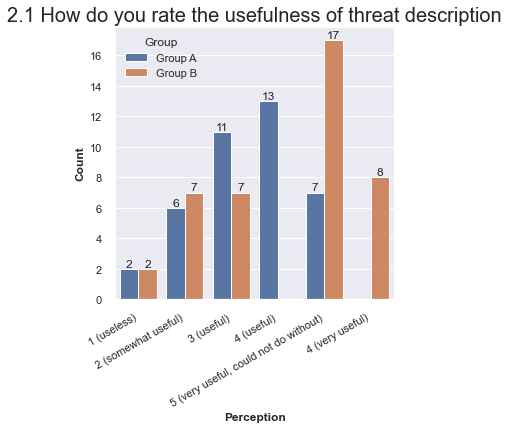

In [494]:
df_process_understand_a = df_group_a_data[['PerceptionA_5', 'Process.Correct', 'GroupA']].groupby('PerceptionA_5').count()
df_process_understand_a['Group'] = 'Group A'
df_process_understand_b = df_group_b_data[['PerceptionB_5', 'Process.Correct', 'GroupA']].groupby('PerceptionB_5').count()
df_process_understand_b['Group'] = 'Group B'

df_process_understand = pd.concat([df_process_understand_a, df_process_understand_b])
df_process_understand
sns.set(style="darkgrid")
plt.figure(figsize=(5, 5))
g = sns.barplot(x=df_process_understand.index, y="GroupA", hue="Group", data=df_process_understand, ci=None)
g.set_title("How do you rate the usefulness of threat description", fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')
g.set_xlabel("Perception", fontweight='bold')
g.set_ylabel("Count", fontweight='bold')
for container in g.containers:
    g.bar_label(container, fmt='%.d')

# 2.1 How do you rate the usefulness of the information sources (in the handout material) you were given for the task (that is, marking correct applicable threats)? - Threat description


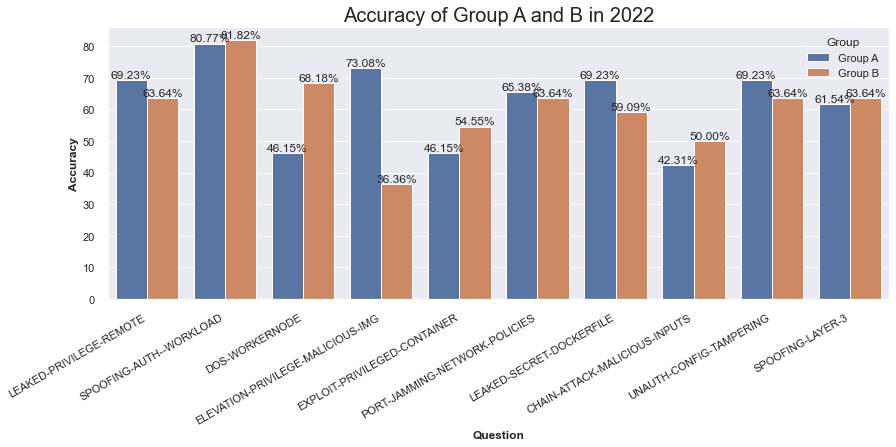

In [614]:
question_list = ['LEAKED-PRIVILEGE-REMOTE','SPOOFING-AUTH--WORKLOAD','DOS-WORKERNODE','ELEVATION-PRIVILEGE-MALICIOUS-IMG','EXPLOIT-PRIVILEGED-CONTAINER','PORT-JAMMING-NETWORK-POLICIES','LEAKED-SECRET-DOCKERFILE','CHAIN-ATTACK-MALICIOUS-INPUTS','UNAUTH-CONFIG-TAMPERING','SPOOFING-LAYER-3']
question = '3.1 You had a clear understanding of what the task asked you to do.'
df_2022 = cleaned_experiment_data.drop(cleaned_experiment_data[cleaned_experiment_data[question]=='Disagree'].index)

df_a_data_2022 = df_2022.iloc[:,8:18]
df_a_data_2022.columns = [question_list]
df_a_data_2022.dropna(how='all', inplace=True)
df_a_data_2022['Group'] = 'Group A'

df_b_data_2022 = df_2022.iloc[:,19:29]
df_b_data_2022.columns = [question_list]
df_b_data_2022.dropna(how='all', inplace=True)
df_b_data_2022['Group'] = 'Group B'

df_a_question_2022, df_b_question_2022 = df_a_data_2022.count().to_frame(), df_b_data_2022.count().to_frame()
df_a_question_2022.columns = ['Group A']
df_b_question_2022.columns = ['Group B']
# df_a_question_2022['Group'] = 'Group A'
# df_b_question_2022['Group'] = 'Group B'

df_question_2022 = pd.concat([df_a_question_2022.T,df_b_question_2022.T])
total_answer = 10
df_accuracy_a1 = df_question_2022.iloc[0,0:5] / df_question_2022.iloc[0,-1]
df_accuracy_a2 = 1 - df_question_2022.iloc[0,5:-1] / df_question_2022.iloc[0,-1]
df_accuracy_a = pd.concat([df_accuracy_a1, df_accuracy_a2])

df_accuracy_b1 = df_question_2022.iloc[1,0:5] / df_question_2022.iloc[1,-1]
df_accuracy_b2 = 1 - df_question_2022.iloc[1,5:-1] / df_question_2022.iloc[1,-1]
df_accuracy_b = pd.concat([df_accuracy_b1, df_accuracy_b2])
# df_accuracy = pd.merge(df_accuracy_a, df_accuracy_b, right_index = True,
#                left_index = True).reset_index()
df_accuracy_a, df_accuracy_b = df_accuracy_a*100, df_accuracy_b*100
df_accuracy_a = df_accuracy_a.to_frame().reset_index().rename({'level_0': 'Question', 'Group A': 'Accuracy'}, axis=1)
df_accuracy_a['Group'] = 'Group A'
df_accuracy_b = df_accuracy_b.to_frame().reset_index().rename({'level_0': 'Question', 'Group B': 'Accuracy'}, axis=1)
df_accuracy_b['Group'] = 'Group B'
df_accuracy = pd.concat([df_accuracy_a,df_accuracy_b])
df_accuracy

sns.set(style="darkgrid")
plt.figure(figsize=(14, 5))
g = sns.barplot(x="Question", y="Accuracy", hue="Group", data=df_accuracy, ci=None)
g.set_title("Accuracy of Group A and B in 2022", fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')
g.set_xlabel("Question", fontweight='bold')
g.set_ylabel("Accuracy", fontweight='bold')
for container in g.containers:
    g.bar_label(container, fmt='%.2f%%')

In [615]:
df_valid = cleaned_experiment_data.iloc[:,[1,3,-5]]
question = '3.1 You had a clear understanding of what the task asked you to do.'
print(df_valid.groupby(question).count())
df_valid = df_valid.drop(df_valid[df_valid[question]=='Disagree'].index)
df_valid.groupby([question,'Which group were you assigned to?']).count()

                                                    Duration (in seconds)  \
3.1 You had a clear understanding of what the t...                          
Agree                                                                  25   
Disagree                                                                5   
Neither-Agree-nor-Disagree                                             13   
Strongly agree                                                         10   

                                                    Which group were you assigned to?  
3.1 You had a clear understanding of what the t...                                     
Agree                                                                              25  
Disagree                                                                            5  
Neither-Agree-nor-Disagree                                                         13  
Strongly agree                                                                     10  


Duration (in seconds)
3.1 You had a clear understanding of what the t... Which group were you assigned to?                       
Agree                                              Group A                                               11
                                                   Group B                                               14
Neither-Agree-nor-Disagree                         Group A                                                9
                                                   Group B                                                4
Strongly agree                                     Group A                                                6
                                                   Group B                                                4

In [608]:
question = '3.1 You had a clear understanding of what the task asked you to do.'
df_valid[df_valid[question]=='Disagree']

,Which group were you assigned to?,3.1 You had a clear understanding of what the task asked you to do.
6,Group A,Disagree
8,Group B,Disagree
25,Group B,Disagree
39,Group A,Disagree
41,Group A,Disagree


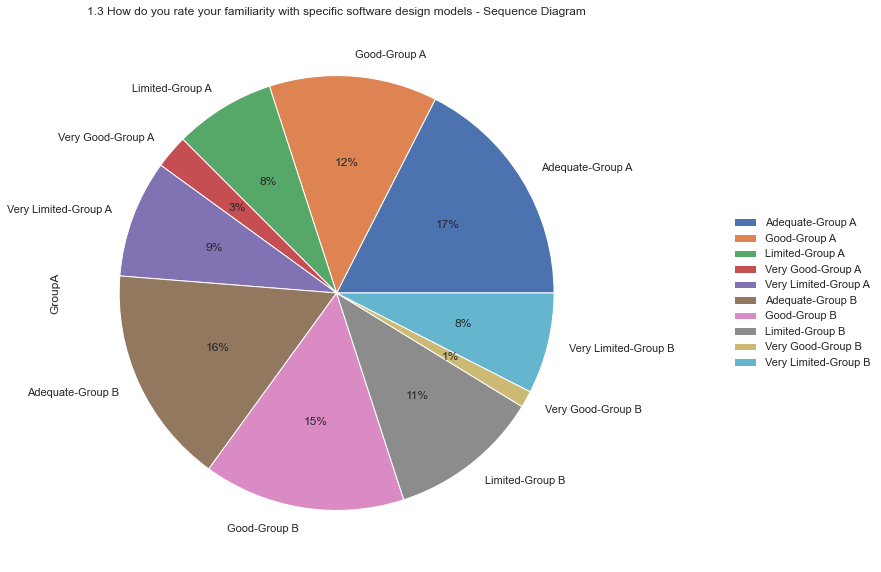

In [682]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

df_process_understand_a = df_group_a_data[['Q3_1', 'GroupA']].groupby('Q3_1').count()
df_process_understand_a['Group'] = 'Group A'
df_process_understand_b = df_group_b_data[['Q3_1', 'GroupA']].groupby('Q3_1').count()
df_process_understand_b['Group'] = 'Group B'

df_process_understand = pd.concat([df_process_understand_a, df_process_understand_b]).reset_index()
df_process_understand['Perception'] = df_process_understand[['Q3_1', 'Group']].agg('-'.join, axis=1)
df_process_understand = df_process_understand.set_index('Perception')
plot = df_process_understand.plot(kind='pie',y='GroupA',autopct='%1.0f%%', title='1.3 How do you rate your familiarity with specific software design models - Sequence Diagram', figsize=(10, 10))
legend = plt.legend(bbox_to_anchor=(1.5, 0.5), loc='center right', facecolor='pink')
# displaying chart
# plt.show()
# sns.set(style="darkgrid")
# plt.figure(figsize=(5, 5))
# g = sns.barplot(x=df_process_understand.index, y="GroupA", hue="Group", data=df_process_understand, ci=None)
# g.set_title("You had a clear understanding of what the task asked you to do?", fontsize=20)
# g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')
# g.set_xlabel("Process.Understand", fontweight='bold')
# g.set_ylabel("Count", fontweight='bold')
# for container in g.containers:
#     g.bar_label(container, fmt='%.d')


In [681]:
df_process_understand

,Q3_1,GroupA,Group
Perception,,,
Adequate-Group A,Adequate,14,Group A
Good-Group A,Good,10,Group A
Limited-Group A,Limited,6,Group A
Very Good-Group A,Very Good,2,Group A
Very Limited-Group A,Very Limited,7,Group A
Adequate-Group B,Adequate,13,Group B
Good-Group B,Good,12,Group B
Limited-Group B,Limited,9,Group B
Very Good-Group B,Very Good,1,Group B
